# IMPORT DATA

In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
con = sqlite3.connect("database.sqlite")
data_country = pd.read_sql_query("SELECT * from Country", con)
data_league = pd.read_sql_query("SELECT * from League", con)
data_match = pd.read_sql_query("SELECT * from Match", con)
data_player = pd.read_sql_query("SELECT * from Player", con)
data_player_att = pd.read_sql_query("SELECT * from Player_Attributes", con)
data_team = pd.read_sql_query("SELECT * from Team", con)
data_team_att = pd.read_sql_query("SELECT * from Team_Attributes", con)

# CLEAN MATCH DATA

In [3]:
# Print out names of all cols
count = 0
for colname in data_match.columns:
    count +=1
    print(colname)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [4]:
# View xtml attributes
print(data_match['corner'].dropna())

1728     <corner><value><stats><corners>1</corners></st...
1729     <corner><value><stats><corners>1</corners></st...
1730     <corner><value><stats><corners>1</corners></st...
1731     <corner><value><stats><corners>1</corners></st...
1732     <corner><value><stats><corners>1</corners></st...
                               ...                        
25944                                           <corner />
25945                                           <corner />
25946                                           <corner />
25947                                           <corner />
25948                                           <corner />
Name: corner, Length: 14217, dtype: object


In [5]:
# Drop xtml attributes
match = data_match.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'], axis = 1)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Deal with na's
nan_counts = match.isna().sum(axis=0)
nan_counts = pd.DataFrame({'nan_perc': nan_counts/25979})

print(nan_counts[nan_counts['nan_perc'] > 0.1].sort_values(by= ['nan_perc'], ascending = False))

       nan_perc
PSH    0.570114
PSA    0.570114
PSD    0.570114
BSA    0.454906
BSD    0.454906
BSH    0.454906
GBA    0.454867
GBD    0.454867
GBH    0.454867
SJD    0.341892
SJH    0.341892
SJA    0.341892
IWA    0.133146
IWD    0.133146
IWH    0.133146
LBA    0.131760
LBH    0.131760
LBD    0.131760
VCH    0.131298
VCA    0.131298
VCD    0.131298
WHH    0.131183
WHA    0.131183
WHD    0.131183
BWA    0.131029
BWD    0.131029
BWH    0.131029
B365D  0.130375
B365A  0.130375
B365H  0.130375


In [7]:
# Delete all cols with na > .14
print("NUMBER OF ROWS BEFORE DROP")
print(len(match))
match = match.drop(["PSH", "PSA", "PSD", "BSA", "BSD", "BSH", "GBA", "GBD", "GBH", "SJD", "SJH", "SJA"], axis=1)

# Remove all rows with remaining nan values 
match = match.dropna()
print("NUMBER OF ROWS AFTER DROP")
print(len(match))

NUMBER OF ROWS BEFORE DROP
25979
NUMBER OF ROWS AFTER DROP
19561


In [8]:
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,...,2.20,2.75,3.25,2.20,2.62,3.2,2.30,2.65,3.25,2.35
153,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,...,2.20,3.20,3.20,2.00,3.20,3.2,2.00,2.65,3.20,2.35
155,156,1,1,2008/2009,25,2009-03-07 00:00:00,493027,8635,10000,2,...,7.00,1.36,4.00,7.00,1.36,4.0,7.00,1.30,4.35,8.00
162,163,1,1,2008/2009,26,2009-03-13 00:00:00,493034,8203,8635,2,...,1.70,4.00,3.40,1.72,4.33,3.3,1.70,4.35,3.30,1.75
168,169,1,1,2008/2009,26,2009-03-14 00:00:00,493040,10000,9999,0,...,4.20,1.61,3.25,5.00,1.67,3.4,4.33,1.65,3.50,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,4.90,1.57,3.75,6.50,1.62,3.3,7.00,1.57,4.00,7.00
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,3.20,2.25,3.20,3.25,2.38,3.1,3.10,2.30,3.40,3.40
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,5.40,1.50,4.00,6.50,1.57,3.5,7.00,1.55,4.20,7.00
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,2.75,2.30,3.20,3.10,2.40,3.1,3.10,2.30,3.40,3.30


# CREATE FEATURES FROM TEAM DATA

In [9]:
# Individual Team Success Factors
data_team['matches_played'] = np.zeros(299, dtype=int)
data_team['wins'] = np.zeros(299, dtype=int)
data_team['win_rate'] = np.zeros(299, dtype=float)
all_teams = data_team['team_api_id'].unique() # List of all team IDs

# Set number of wins and total matches played for each team
for t in all_teams:
    t_data = match.loc[data_match['home_team_api_id'] == t]
    total_matches = len(t_data)
    if total_matches != 0:
        win_data = t_data.loc[t_data['home_team_goal'] > t_data['away_team_goal']]
        total_wins = len(win_data)
        t_data = match.loc[data_match['away_team_api_id'] == t]
        total_matches += len(t_data)
        win_data = t_data.loc[t_data['away_team_goal'] > t_data['home_team_goal']]
        total_wins += len(win_data)
        data_team.loc[data_team['team_api_id'] == t, 'matches_played'] = total_matches
        data_team.loc[data_team['team_api_id'] == t, 'wins'] = total_wins
        data_team.loc[data_team['team_api_id'] == t, 'win_rate'] = total_wins / total_matches
    else:
        print(f"No matches found for team {t}")

No matches found for team 7947
No matches found for team 4049
No matches found for team 9996
No matches found for team 6601
No matches found for team 10265
No matches found for team 8031
No matches found for team 8020
No matches found for team 1601
No matches found for team 8673
No matches found for team 2183
No matches found for team 8025
No matches found for team 8030
No matches found for team 8244
No matches found for team 8242
No matches found for team 2182
No matches found for team 8569
No matches found for team 8322
No matches found for team 1957
No matches found for team 8028
No matches found for team 2186
No matches found for team 8245
No matches found for team 8021
No matches found for team 8024
No matches found for team 8033
No matches found for team 8023
No matches found for team 8027
No matches found for team 8019
No matches found for team 177361
No matches found for team 7992
No matches found for team 10213
No matches found for team 9956
No matches found for team 6493
No m

In [10]:
data_team['buildUpPlaySpeed'] = np.zeros(299, dtype=float)
data_team['buildUpPlayDribbling'] = np.zeros(299, dtype=float)
data_team['buildUpPlayPassing'] = np.zeros(299, dtype=float)
data_team['chanceCreationPassing'] = np.zeros(299, dtype=float)
data_team['chanceCreationCrossing'] = np.zeros(299, dtype=float)
data_team['chanceCreationShooting'] = np.zeros(299, dtype=float)
data_team['defencePressure'] = np.zeros(299, dtype=float)
data_team['defenceAggression'] = np.zeros(299, dtype=float)
data_team['defenceTeamWidth'] = np.zeros(299, dtype=float)

# Set average metrics for each team
for t in all_teams:
    t_data = data_team_att.loc[data_team_att['team_api_id'] == t]
    data_team.loc[data_team['team_api_id'] == t, 'buildUpPlaySpeed'] = t_data['buildUpPlaySpeed'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'buildUpPlayDribbling'] = t_data['buildUpPlayDribbling'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'buildUpPlayPassing'] = t_data['buildUpPlayPassing'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'chanceCreationPassing'] = t_data['chanceCreationPassing'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'chanceCreationCrossing'] = t_data['chanceCreationCrossing'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'chanceCreationShooting'] = t_data['chanceCreationShooting'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'defencePressure'] = t_data['defencePressure'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'defenceAggression'] = t_data['defenceAggression'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'defenceTeamWidth'] = t_data['defenceTeamWidth'].mean()


In [11]:
data_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,matches_played,wins,win_rate,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,9987,673.0,KRC Genk,GEN,154,70,0.454545,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333
1,2,9993,675.0,Beerschot AC,BAC,96,24,0.250000,46.000000,NaN,41.500000,46.000000,53.500000,53.750000,48.250000,49.000000,58.750000
2,3,10000,15005.0,SV Zulte-Waregem,ZUL,154,52,0.337662,55.500000,42.0,52.666667,50.000000,49.333333,41.500000,48.666667,56.166667,47.833333
3,4,9994,2007.0,Sporting Lokeren,LOK,138,49,0.355072,64.000000,45.0,53.500000,44.000000,47.666667,54.333333,48.833333,55.166667,55.500000
4,5,9984,1750.0,KSV Cercle Brugge,CEB,135,38,0.281481,53.666667,49.0,44.166667,59.000000,60.333333,48.000000,60.166667,49.666667,64.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL,0,0,0.000000,47.600000,46.0,51.800000,39.800000,45.200000,44.400000,43.800000,45.600000,50.800000
295,49837,10191,1715.0,FC Thun,THU,0,0,0.000000,56.600000,59.0,35.800000,63.200000,36.400000,59.000000,45.000000,42.800000,51.600000
296,50201,9777,324.0,Servette FC,SER,0,0,0.000000,42.000000,NaN,52.333333,50.333333,67.333333,50.000000,51.000000,50.000000,51.000000
297,50204,7730,1862.0,FC Lausanne-Sports,LAU,0,0,0.000000,38.750000,55.0,51.750000,49.000000,60.000000,52.000000,46.750000,47.500000,53.750000


# MERGE MATCH AND TEAM DATA

In [12]:
# Add data about home and away teams to match
data_team_home = data_team.drop(['id', 'team_fifa_api_id', 'team_long_name', 'team_short_name'], axis = 1)
data_team_away = data_team.drop(['id', 'team_fifa_api_id', 'team_long_name', 'team_short_name'], axis = 1)

home_cols = ["home_" + col for col in data_team_home.columns]
data_team_home.columns = home_cols

away_cols = ["away_" + col for col in data_team_away.columns]
data_team_away.columns = away_cols

print(data_team_away.columns)

Index(['away_team_api_id', 'away_matches_played', 'away_wins', 'away_win_rate',
       'away_buildUpPlaySpeed', 'away_buildUpPlayDribbling',
       'away_buildUpPlayPassing', 'away_chanceCreationPassing',
       'away_chanceCreationCrossing', 'away_chanceCreationShooting',
       'away_defencePressure', 'away_defenceAggression',
       'away_defenceTeamWidth'],
      dtype='object')


In [13]:
final_data = pd.merge(match, data_team_home, left_on='home_team_api_id', right_on='home_team_api_id')
final_data = pd.merge(final_data, data_team_away, left_on='away_team_api_id', right_on='away_team_api_id')
final_data

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_win_rate,away_buildUpPlaySpeed,away_buildUpPlayDribbling,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth
0,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,...,0.454545,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333
1,531,1,1,2010/2011,10,2010-10-01 00:00:00,838587,8203,9987,2,...,0.454545,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333
2,874,1,1,2011/2012,22,2012-01-25 00:00:00,1032865,8203,9987,3,...,0.454545,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333
3,1131,1,1,2012/2013,24,2013-01-26 00:00:00,1224173,8203,9987,2,...,0.454545,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333
4,1254,1,1,2014/2015,1,2014-07-27 00:00:00,1717822,8203,9987,3,...,0.454545,56.333333,52.0,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,21767,21518,21518,2008/2009,31,2009-04-18 00:00:00,530613,9906,8388,3,...,0.250000,50.333333,48.0,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667
19557,21587,21518,21518,2008/2009,15,2008-12-14 00:00:00,530352,9864,8388,2,...,0.250000,50.333333,48.0,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667
19558,21624,21518,21518,2008/2009,19,2009-01-17 00:00:00,530449,8302,8388,1,...,0.250000,50.333333,48.0,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667
19559,21567,21518,21518,2008/2009,13,2008-11-30 00:00:00,530332,8315,8388,2,...,0.250000,50.333333,48.0,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667


In [14]:
# Remove all irrelevant features
final_data = final_data.drop(['id', 'country_id', 'league_id', "season", "stage", "date", "match_api_id", "home_team_api_id", "away_team_api_id"], axis=1)

# Remove player data
home_players = final_data.filter(regex="home_player_.*").columns
away_players = final_data.filter(regex="away_player_.*").columns

final_data.drop(home_players, axis=1, inplace=True)
final_data.drop(away_players, axis=1, inplace=True)

In [15]:
# Make dummy variables for win loss and draw
final_data['home_win'] = np.where((final_data['home_team_goal'] > final_data['away_team_goal']), 1, 0)
final_data['away_win'] = np.where((final_data['home_team_goal'] < final_data['away_team_goal']), 1, 0)
final_data['draw'] = np.where((final_data['home_team_goal'] == final_data['away_team_goal']), 1, 0)

final_data[['home_team_goal', 'away_team_goal', 'home_win', 'away_win', 'draw']]

final_data.drop(['home_team_goal', 'away_team_goal'], axis=1, inplace=True)

final_data

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,home_win,away_win,draw
0,3.00,3.40,2.30,2.95,3.25,2.20,2.80,3.1,2.2,2.75,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0
1,3.75,3.30,2.00,3.75,3.50,1.83,3.10,3.2,2.0,3.40,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,0,0,1
2,2.63,3.30,2.63,2.50,3.30,2.65,2.50,3.2,2.5,2.40,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0
3,2.63,3.30,2.63,2.50,3.30,2.50,2.60,3.1,2.5,2.62,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0
4,2.63,3.25,2.63,2.60,3.20,2.50,2.60,3.1,2.5,2.85,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,1.33,4.75,9.50,1.30,4.65,8.50,1.37,4.4,8.0,1.36,...,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0
19557,1.95,3.30,4.00,1.80,3.25,4.15,1.80,3.2,4.0,1.80,...,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0
19558,1.33,4.75,9.50,1.35,4.20,8.00,1.30,4.6,8.0,1.33,...,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0
19559,1.85,3.50,4.20,1.85,3.15,4.10,1.85,3.2,3.8,1.80,...,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0


In [16]:
final_data

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,home_win,away_win,draw
0,3.00,3.40,2.30,2.95,3.25,2.20,2.80,3.1,2.2,2.75,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0
1,3.75,3.30,2.00,3.75,3.50,1.83,3.10,3.2,2.0,3.40,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,0,0,1
2,2.63,3.30,2.63,2.50,3.30,2.65,2.50,3.2,2.5,2.40,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0
3,2.63,3.30,2.63,2.50,3.30,2.50,2.60,3.1,2.5,2.62,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0
4,2.63,3.25,2.63,2.60,3.20,2.50,2.60,3.1,2.5,2.85,...,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,1.33,4.75,9.50,1.30,4.65,8.50,1.37,4.4,8.0,1.36,...,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0
19557,1.95,3.30,4.00,1.80,3.25,4.15,1.80,3.2,4.0,1.80,...,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0
19558,1.33,4.75,9.50,1.35,4.20,8.00,1.30,4.6,8.0,1.33,...,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0
19559,1.85,3.50,4.20,1.85,3.15,4.10,1.85,3.2,3.8,1.80,...,45.500000,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0


# VISUALIZATION

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\jexia\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


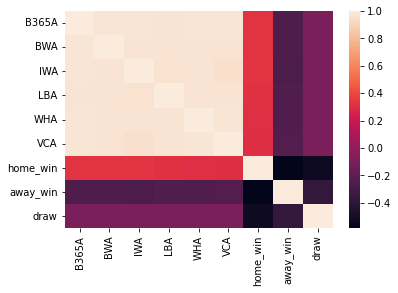

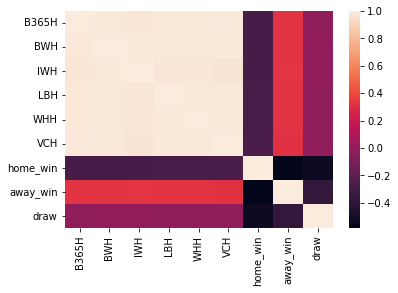

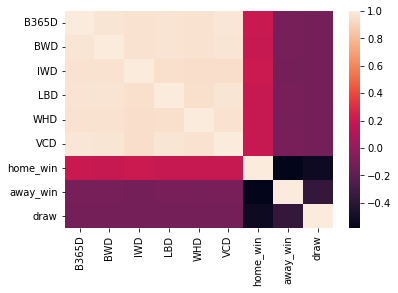

In [18]:
# Heatmap of all betting 

# Away odds
columns = final_data.columns.tolist()
selected_columns = [col for col in columns if col.endswith("A")]
match_betting = final_data[selected_columns]
match_betting[['home_win', 'away_win', 'draw']] = final_data[['home_win', 'away_win', 'draw']]
match_betting = match_betting.dropna()

ax = sns.heatmap(match_betting.corr())
plt.show()

# home odds
columns = final_data.columns.tolist()
selected_columns = [col for col in columns if col.endswith("H")]
match_betting = final_data[selected_columns]
match_betting[['home_win', 'away_win', 'draw']] = final_data[['home_win', 'away_win', 'draw']]
match_betting = match_betting.dropna()

ax = sns.heatmap(match_betting.corr())
plt.show()

# draw odds
columns = final_data.columns.tolist()
selected_columns = [col for col in columns if col.endswith("D")]
match_betting = final_data[selected_columns]
match_betting[['home_win', 'away_win', 'draw']] = final_data[['home_win', 'away_win', 'draw']]
match_betting = match_betting.dropna()

ax = sns.heatmap(match_betting.corr())
plt.show()

In [19]:
# Merge all remaining betting data, since they are all heavily correlated

cols_to_avg = ['IWH', 'LBH', 'VCH', 'WHH', 'BWH', 'B365H']
final_data['avg_betting_odds'] = final_data[cols_to_avg].mean(axis=1)
final_data = final_data.drop(cols_to_avg, axis=1)
final_data = final_data.drop(['IWA', 'LBA', 'VCA', 'WHA', 'BWA', 'B365A', 'IWD', 'LBD', 'VCD', 'WHD', 'BWD', 'B365D'], axis=1)
final_data


,home_matches_played,home_wins,home_win_rate,home_buildUpPlaySpeed,home_buildUpPlayDribbling,home_buildUpPlayPassing,home_chanceCreationPassing,home_chanceCreationCrossing,home_chanceCreationShooting,home_defencePressure,...,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,home_win,away_win,draw,avg_betting_odds
0,152,54,0.355263,56.666667,42.0,47.333333,47.500000,49.833333,50.333333,47.666667,...,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0,2.795000
1,152,54,0.355263,56.666667,42.0,47.333333,47.500000,49.833333,50.333333,47.666667,...,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,0,0,1,3.508333
2,152,54,0.355263,56.666667,42.0,47.333333,47.500000,49.833333,50.333333,47.666667,...,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0,2.541667
3,152,54,0.355263,56.666667,42.0,47.333333,47.500000,49.833333,50.333333,47.666667,...,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0,2.598333
4,152,54,0.355263,56.666667,42.0,47.333333,47.500000,49.833333,50.333333,47.666667,...,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,1,0,0,2.630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,284,156,0.549296,53.166667,51.0,47.833333,64.666667,62.666667,60.000000,55.500000,...,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0,1.345000
19557,268,94,0.350746,48.500000,46.5,42.166667,58.000000,57.833333,55.166667,54.833333,...,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0,1.838333
19558,286,126,0.440559,57.000000,53.0,56.000000,58.333333,58.333333,52.500000,45.500000,...,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0,1.323333
19559,274,108,0.394161,51.666667,43.5,48.000000,46.666667,70.166667,46.833333,39.666667,...,50.666667,45.333333,56.000000,45.000000,48.000000,59.666667,1,0,0,1.825000


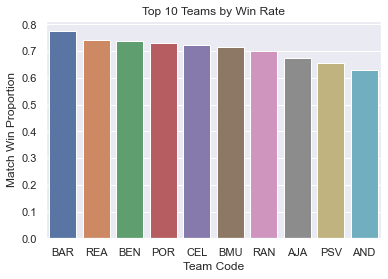

In [20]:
# Show top teams with win rate
data_team.sort_values(by=['win_rate'], ascending=False, inplace=True)
sns.set_theme(style="darkgrid")
sns.barplot(x=data_team.head(10)['team_short_name'], y=data_team.head(10)['win_rate'])
plt.title('Top 10 Teams by Win Rate')
plt.ylabel('Match Win Proportion', fontsize=12)
plt.xlabel('Team Code', fontsize=12)
plt.show()

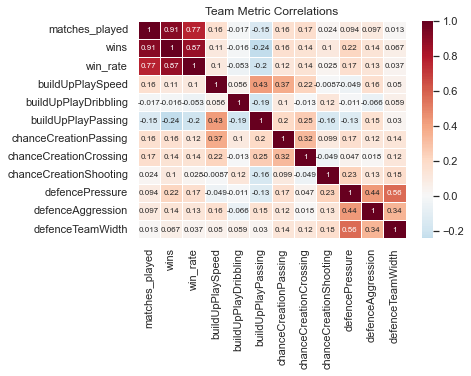

In [21]:
# Visualize Team Metric Correlations
correlations = data_team[['matches_played', 'wins', 'win_rate', 'buildUpPlaySpeed', 'buildUpPlayDribbling',
                          'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
                          'defencePressure', 'defenceAggression', 'defenceTeamWidth']].corr(method='pearson')
sns.heatmap(data=correlations,xticklabels=correlations.columns,yticklabels=correlations.columns,cmap='RdBu_r',annot=True,
            linewidth=0.5,center=0,annot_kws={'fontsize':8})
plt.title('Team Metric Correlations')
plt.show()

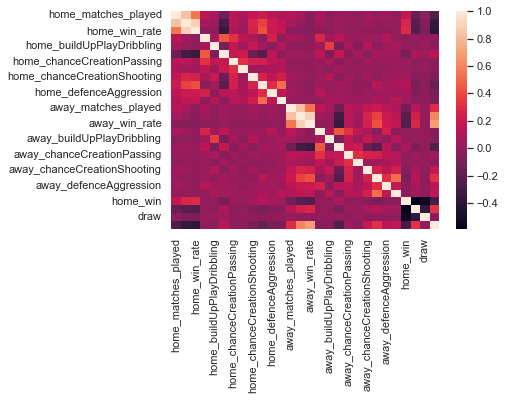

home_matches_played            0.169864
home_wins                      0.263168
home_win_rate                  0.289633
home_buildUpPlaySpeed         -0.011574
home_buildUpPlayDribbling     -0.001371
home_buildUpPlayPassing       -0.106879
home_chanceCreationPassing     0.030571
home_chanceCreationCrossing    0.015195
home_chanceCreationShooting    0.063816
home_defencePressure           0.117022
home_defenceAggression         0.058065
home_defenceTeamWidth          0.042536
away_matches_played           -0.132153
away_wins                     -0.213563
away_win_rate                 -0.236297
away_buildUpPlaySpeed          0.002397
away_buildUpPlayDribbling     -0.003929
away_buildUpPlayPassing        0.080525
away_chanceCreationPassing    -0.017467
away_chanceCreationCrossing   -0.014050
away_chanceCreationShooting   -0.048918
away_defencePressure          -0.095475
away_defenceAggression        -0.045290
away_defenceTeamWidth         -0.036148
home_win                       1.000000


In [22]:
# Heatmap 
corr = final_data.corr()
ax = sns.heatmap(corr)
plt.show()

print(corr['home_win'])

In [23]:
final_data.to_csv('final_data.csv')